## Importing the relevant packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [3]:
url = './ignore/S3/L11/Index2018.csv'
raw_csv_data = pd.read_csv(url) 
df=raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [4]:
df['market_value']=df.ftse

In [5]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:]

In [6]:
# import warnings
# warnings.filterwarnings("ignore")

## The LLR Test

In [7]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [10]:
df_train['returns'] = df_train['market_value'].pct_change(1)*100

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_4614/844452794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns'] = df_train['market_value'].pct_change(1)*100


## ARMA(1,1)

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
returns_arma11 = ARIMA(df_train['returns'][1:], order=(1,0,1))
results_returns_arma11 = returns_arma11.fit()
print(results_returns_arma11.summary())

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Wed, 04 Jan 2023   AIC                          15841.000
Time:                        01:19:00   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.0

(-0.1, 0.1)

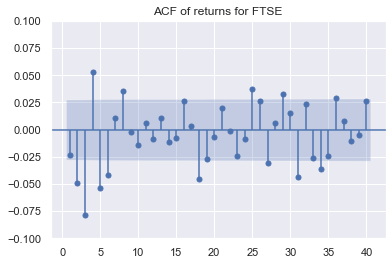

In [35]:
sgt.plot_acf(df_train['returns'][1:], lags=40, zero=False)
plt.title("ACF of returns for FTSE")
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

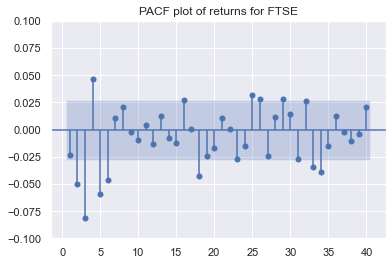

In [38]:
sgt.plot_pacf(df_train['returns'][1:], lags=40, zero=False, method='ols')
plt.title("PACF plot of returns for FTSE")
plt.ylim(-0.1, 0.1)

## Higher-Lag ARMA Models

In [41]:
returns_arma33 = ARIMA(df_train['returns'][1:], order=(3,0,3))
results_returns_arma33 = returns_arma33.fit()
print(results_returns_arma33.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7893.515
Date:                Wed, 04 Jan 2023   AIC                          15803.030
Time:                        01:42:27   BIC                          15855.200
Sample:                    01-10-1994   HQIC                         15821.311
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.1880      0.068     -2.780      0.005      -0.321      -0.055
ar.L2         -0.2926      0.054     -5.380      0.0

In [42]:
LLR_test(returns_arma11, returns_arma33, DF=4)

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.0

    ARMA(3,2)

In [43]:
returns_arma32 = ARIMA(df_train['returns'][1:], order=(3,0,2))
results_returns_arma32 = returns_arma32.fit()
print(results_returns_arma32.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7895.747
Date:                Wed, 04 Jan 2023   AIC                          15805.495
Time:                        01:44:24   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.211      0.226      -0.012       0.049
ar.L1         -0.6778      0.055    -12.298      0.000      -0.786      -0.570
ar.L2         -0.5082      0.063     -8.035      0.0

    ARMA(2,3)

In [44]:
returns_arma23 = ARIMA(df_train['returns'][1:], order=(2,0,3))
results_returns_arma23 = returns_arma23.fit()
print(results_returns_arma23.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7895.587
Date:                Wed, 04 Jan 2023   AIC                          15805.175
Time:                        01:46:38   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.015      1.224      0.221      -0.011       0.049
ar.L1         -0.5600      0.057     -9.777      0.000      -0.672      -0.448
ar.L2         -0.4178      0.065     -6.381      0.0

    ARMA(3,1)

In [45]:
returns_arma31 = ARIMA(df_train['returns'][1:], order=(3,0,1))
results_returns_arma31 = returns_arma31.fit()
print(results_returns_arma31.summary())

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7899.072
Date:                Wed, 04 Jan 2023   AIC                          15810.144
Time:                        01:48:53   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.247      0.212      -0.011       0.048
ar.L1         -0.5074      0.062     -8.155      0.000      -0.629      -0.385
ar.L2         -0.0638      0.009     -7.026      0.0

    ARMA(2,2)

In [46]:
returns_arma22 = ARIMA(df_train['returns'][1:], order=(2,0,2))
results_returns_arma22 = returns_arma22.fit()
print(results_returns_arma22.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7914.692
Date:                Wed, 04 Jan 2023   AIC                          15841.384
Time:                        01:49:48   BIC                          15880.511
Sample:                    01-10-1994   HQIC                         15855.095
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1         -0.0969      0.091     -1.068      0.286      -0.275       0.081
ar.L2          0.6975      0.066     10.509      0.0

    ARMA(1,3)

In [47]:
returns_arma13 = ARIMA(df_train['returns'][1:], order=(1,0,3))
results_returns_arma13 = returns_arma13.fit()
print(results_returns_arma13.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -7896.838
Date:                Wed, 04 Jan 2023   AIC                          15805.676
Time:                        01:50:25   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.265      0.206      -0.010       0.048
ar.L1         -0.4693      0.060     -7.878      0.000      -0.586      -0.353
ma.L1          0.4469      0.060      7.437      0.0

In [48]:
LLR_test(returns_arma31, returns_arma32)

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.01

In [50]:
print(results_returns_arma32.llf, results_returns_arma32.aic)
print(results_returns_arma13.llf, results_returns_arma13.aic)

-7895.747490025713 15805.494980051426
-7896.837909205716 15805.675818411431


## Residuals for Returns

In [51]:
df_train['resid_returns_arma32'] = results_returns_arma32.resid

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_4614/2700058041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['resid_returns_arma32'] = results_returns_arma32.resid


<AxesSubplot:title={'center':'Residuals of the returns of FTSE for ARMA(3,2) model'}, xlabel='date'>

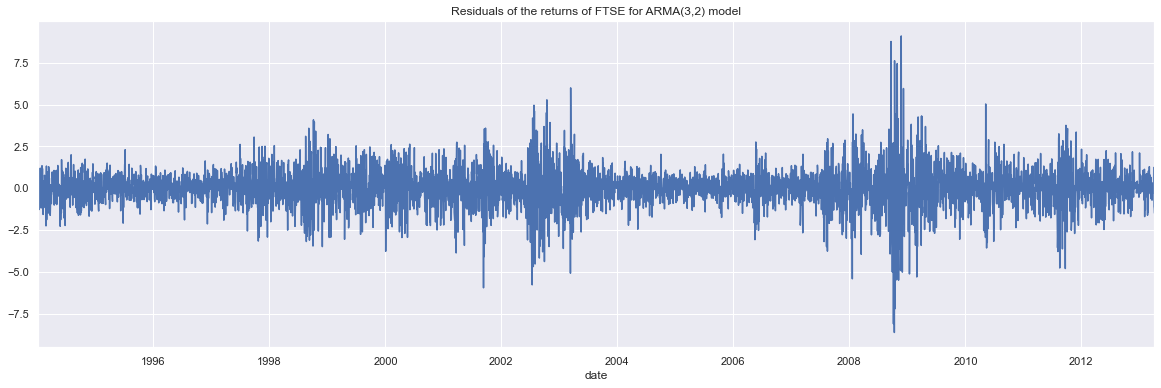

In [52]:
df_train['resid_returns_arma32'].plot(figsize=(20,6), title='Residuals of the returns of FTSE for ARMA(3,2) model')

(-0.1, 0.1)

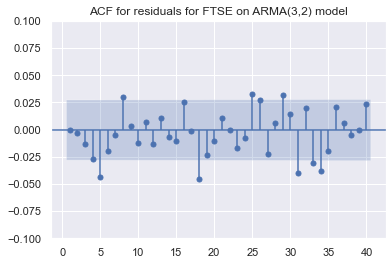

In [55]:
sgt.plot_acf(df_train['resid_returns_arma32'][1:], lags=40, zero=False)
plt.title('ACF for residuals for FTSE on ARMA(3,2) model')
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

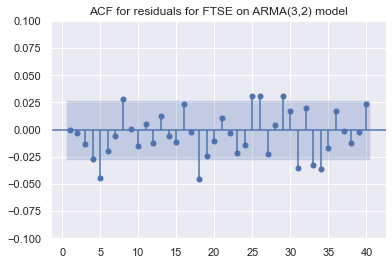

In [56]:
sgt.plot_pacf(df_train['resid_returns_arma32'][1:], lags=40, zero=False, method='ols')
plt.title('ACF for residuals for FTSE on ARMA(3,2) model')
plt.ylim(-0.1, 0.1)

## Reevaluating Model Selection

In [57]:
returns_arma55 = ARIMA(df_train['returns'][1:], order=(5, 0, 5))
results_returns_arma55 = returns_arma55.fit()
print(results_returns_arma55.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -7883.116
Date:                Wed, 04 Jan 2023   AIC                          15790.232
Time:                        02:01:19   BIC                          15868.486
Sample:                    01-10-1994   HQIC                         15817.653
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.015      1.612      0.107      -0.005       0.053
ar.L1         -0.0020      0.123     -0.016      0.987      -0.243       0.240
ar.L2         -0.5213      0.080     -6.494      0.0

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
returns_arma51 = ARIMA(df_train['returns'][1:], order=(5, 0, 1))
results_returns_arma51 = returns_arma51.fit()
print(results_returns_arma51.summary())

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.311
Date:                Wed, 04 Jan 2023   AIC                          15794.623
Time:                        02:03:05   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.301      0.193      -0.010       0.047
ar.L1          0.3443      0.105      3.265      0.001       0.138       0.551
ar.L2         -0.0458      0.009     -4.859      0.0

## Residuals for the New Model

<AxesSubplot:title={'center':'Residuals for the ARMA(5,1) model for the returns of FTSE'}, xlabel='date'>

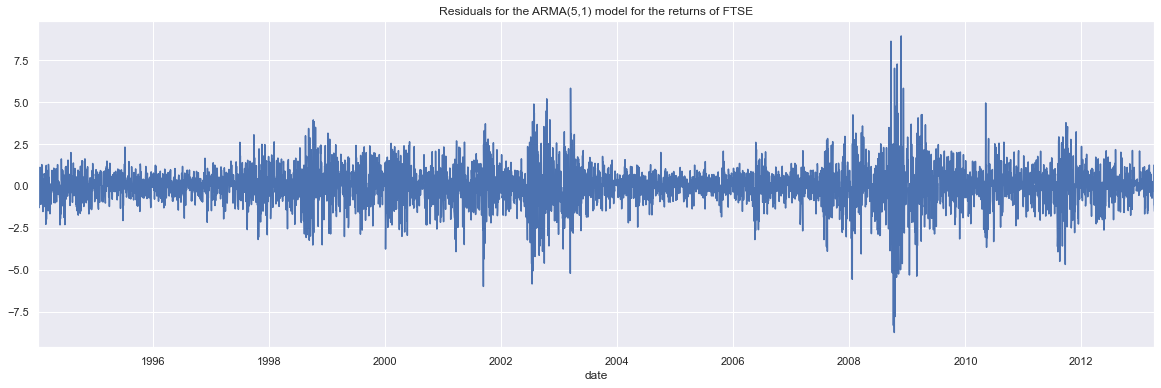

In [61]:
results_returns_arma51.resid.plot(figsize=(20,6), title='Residuals for the ARMA(5,1) model for the returns of FTSE')

(-0.1, 0.1)

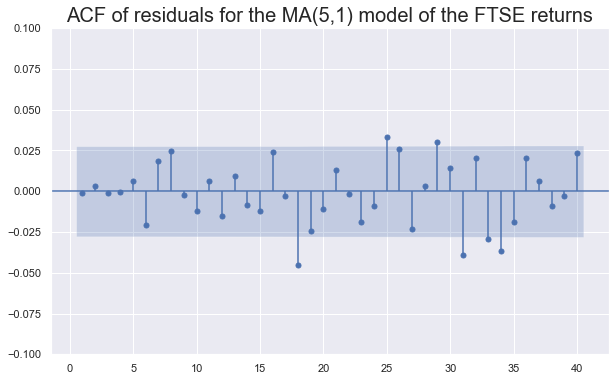

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_acf(results_returns_arma51.resid, lags=40, zero=False, ax=ax)
plt.title("ACF of residuals for the MA(5,1) model of the FTSE returns", size=20)
plt.ylim(-0.1, 0.1)


(-0.1, 0.1)

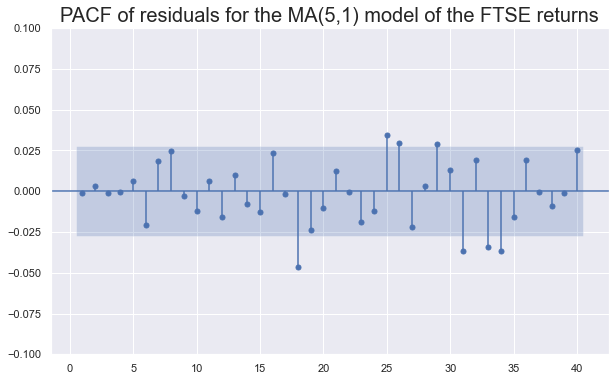

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_pacf(results_returns_arma51.resid, lags=40, zero=False, method='ols', ax=ax)
plt.title("PACF of residuals for the MA(5,1) model of the FTSE returns", size=20)
plt.ylim(-0.1, 0.1)

## ARMA Models for Prices

## ARMA for Returns vs ARMA for Prices